## Question 1) Verify that the mean of power is centered around the variance of the voltage

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
np.random.seed(0)
V = np.random.normal(0, 3, 100000)
P = V**2

print(f"E[P]   = {np.mean(P):.4f}")
print(f"Var(V) = {np.var(V):.4f}")

E[P]   = 8.9522
Var(V) = 8.9522


Plot 1: Voltage Distribution

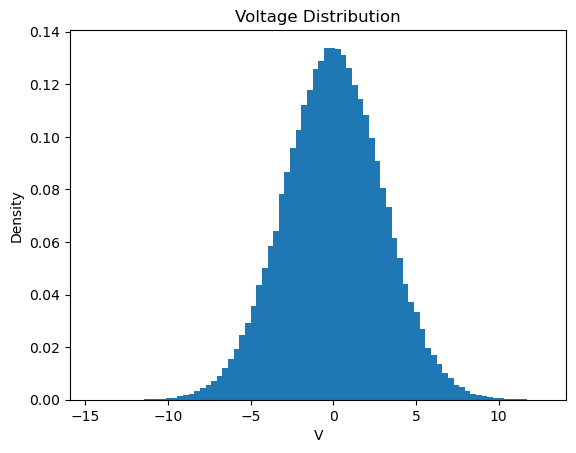

In [9]:
plt.hist(V, bins=80, density=True)
plt.title('Voltage Distribution')
plt.xlabel('V')
plt.ylabel('Density')
plt.show()

Plot 2: Plot 2: Power distribution with E(P) and Var(V) marked

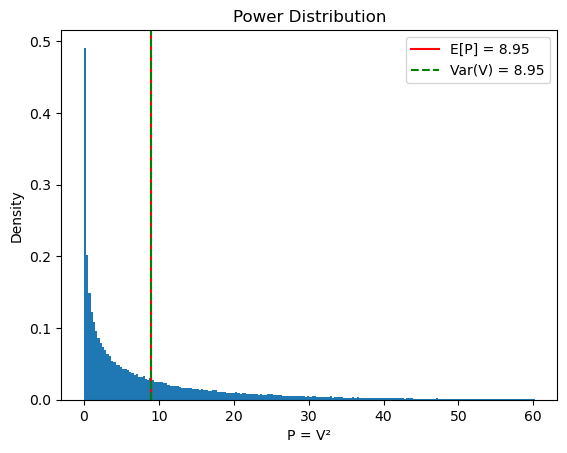

In [13]:
plt.hist(P, bins=200, density=True, range=(0, np.percentile(P, 99)))
plt.axvline(np.mean(P), color='r', label=f'E[P] = {np.mean(P):.2f}')
plt.axvline(np.var(V),  color='g', linestyle='--', label=f'Var(V) = {np.var(V):.2f}')
plt.title('Power Distribution')
plt.xlabel('P = V²')
plt.ylabel('Density')
plt.legend()
plt.show()

Plot 3: Running mean of P converging to Var(V)

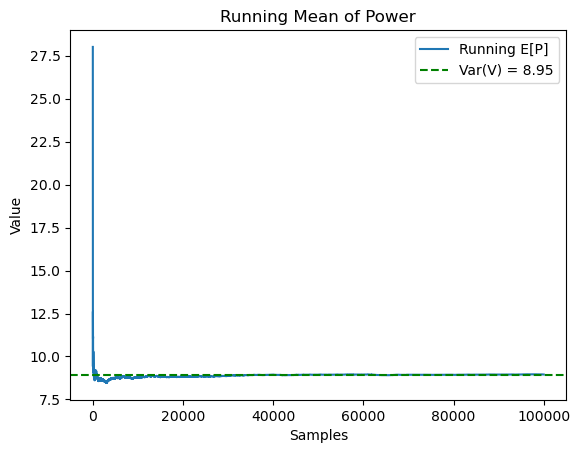

In [19]:
running_mean_P = np.cumsum(P) / np.arange(1, len(P) + 1)
plt.plot(running_mean_P, label='Running E[P]')
plt.axhline(np.var(V), color='g', linestyle='--', label=f'Var(V) = {np.var(V):.2f}')
plt.title('Running Mean of Power')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.show()

**Interpretation**

**Plot 1 — Voltage distribution:** The voltage is zero-mean and Gaussian, so all its energy lives in its spread (variance), not in any DC offset.

**Plot 2 — Power distribution:** Power follows a chi-squared-like distribution (always ≥ 0, right-skewed). The two vertical lines — E[P] (blue) and Var(V) (green dashed) — overlap perfectly, visually confirming **E[P] = Var(V)**.

**Plot 3 — Convergence:** The running mean of P starts noisy but quickly stabilizes and converges to Var(V), confirming the identity holds as sample size grows.

**Conclusion:** Since $V$ has zero mean, $E[V^2] = \text{Var}(V) = \sigma^2$. Because $P = V^2$, it follows directly that $E[P] = \sigma^2$. The simulation confirms this with a negligible numerical difference between the two quantities.

## Question 2) Consider cases of different RMS and plot their histograms

In [21]:
np.random.seed(0)
N = 100000

rms_values = [1, 3, 6]
signals = [np.random.normal(0, rms, N) for rms in rms_values]

In [23]:
for V in signals:
    measured_rms = np.sqrt(np.mean(V**2))
    print(f"Measured RMS = {measured_rms:.4f}")

Measured RMS = 0.9973
Measured RMS = 2.9961
Measured RMS = 6.0030


Plot 1: Voltage histograms for each RMS

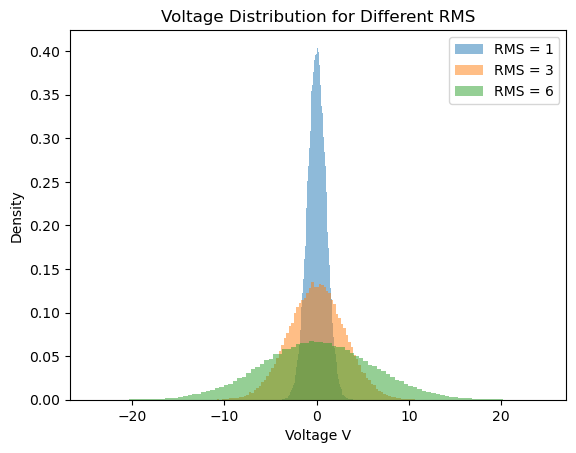

In [28]:
for rms, V in zip(rms_values, signals):
    plt.hist(V, bins=100, density=True, alpha=0.5, label=f'RMS = {rms}')

plt.title('Voltage Distribution for Different RMS')
plt.xlabel('Voltage V')
plt.ylabel('Density')
plt.legend()
plt.show()

**Interpretation**

**Plot 1 — Voltage histograms:** All three distributions are centered at zero (zero-mean). As RMS increases, the distribution spreads wider — a higher RMS means the signal takes larger positive and negative excursions. The peak density drops because the same probability mass is spread over a wider range.

## Question 3) How will the histogram change if I add a slowly varying sine wave in it.

In [44]:
np.random.seed(0)
N  = 100000
t  = np.linspace(0, 1, N)       # 1 second

noise = np.random.normal(0, 1, N)   # Gaussian noise, RMS = 1
sine  = 3 * np.sin(2 * np.pi * 5 * t)  # slow sine, amplitude=3, freq=5 Hz
combined = noise + sine

print(f"Noise    — mean: {np.mean(noise):.3f},    RMS: {np.sqrt(np.mean(noise**2)):.3f}")
print(f"Sine     — mean: {np.mean(sine):.3f},   RMS: {np.sqrt(np.mean(sine**2)):.3f}")
print(f"Combined — mean: {np.mean(combined):.3f},    RMS: {np.sqrt(np.mean(combined**2)):.3f}")

Noise    — mean: 0.002,    RMS: 0.997
Sine     — mean: -0.000,   RMS: 2.121
Combined — mean: 0.002,    RMS: 2.340


Plot 1: Histogram of noise only

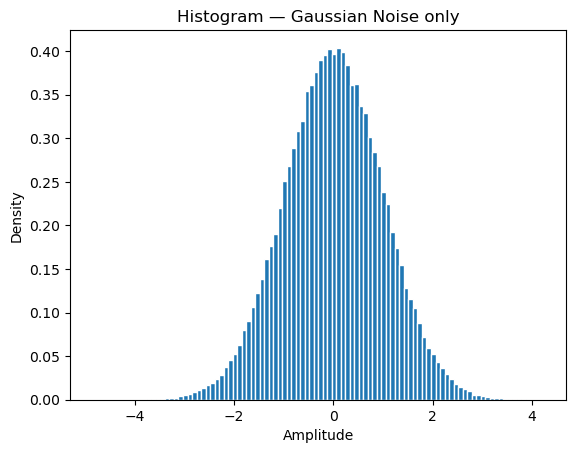

In [46]:
plt.hist(noise, bins=100, density=True, edgecolor = 'white')
plt.title('Histogram — Gaussian Noise only')
plt.xlabel('Amplitude')
plt.ylabel('Density')
plt.show()

Gaussian noise → classic bell curve

Plot 2: Histogram of sine wave only

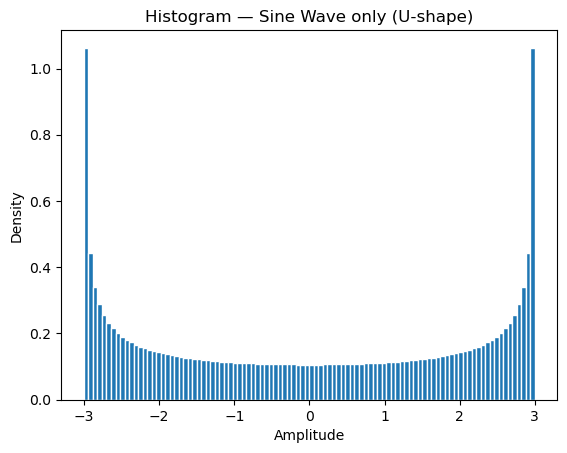

In [48]:
plt.hist(sine, bins=100, density=True, edgecolor = 'white')
plt.title('Histogram — Sine Wave only (U-shape)')
plt.xlabel('Amplitude')
plt.ylabel('Density')
plt.show()

Sine only → U-shape (arcsine distribution): sine spends more time near its peaks ±3 than near zero

Plot 3: All three overlaid for comparison

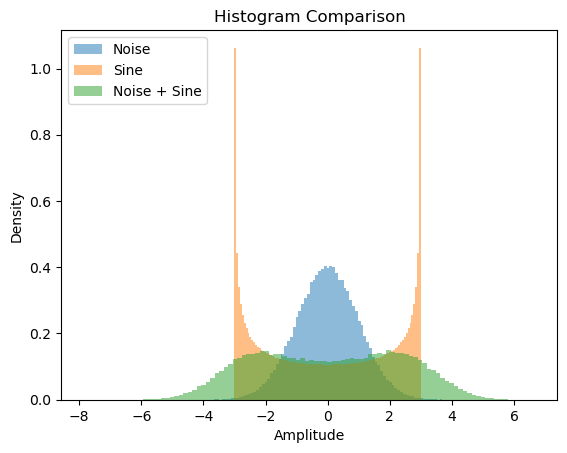

In [51]:
plt.hist(noise,    bins=100, density=True, alpha=0.5, label='Noise')
plt.hist(sine,     bins=100, density=True, alpha=0.5, label='Sine')
plt.hist(combined, bins=100, density=True, alpha=0.5, label='Noise + Sine')
plt.title('Histogram Comparison')
plt.xlabel('Amplitude')
plt.ylabel('Density')
plt.legend()
plt.show()

All three overlaid → you can see the combined signal is wider and flatter than the noise alone

## Question 4) How are the Variances of the ensembles distributed

In [59]:
np.random.seed(0)
sigma2   = 9
N_values = [10, 100, 1000]

variances = {
    N: np.var(np.random.normal(0, 3, (1000, N)), axis=1, ddof=1)
    for N in N_values
}

Plot 1: N = 10

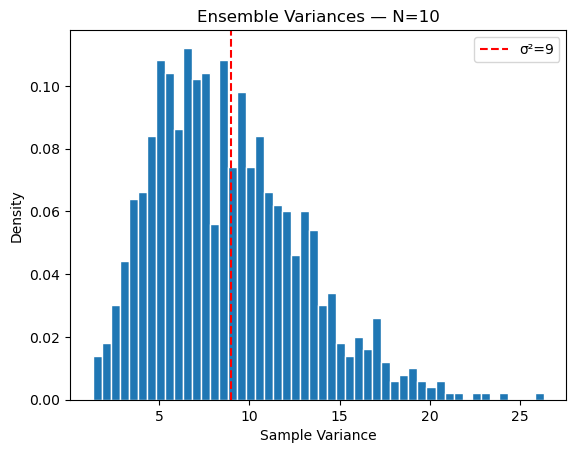

In [63]:
plt.hist(variances[10], bins=50, density=True, edgecolor = 'white')
plt.axvline(sigma2, color='r', linestyle='--', label=f'σ²={sigma2}')
plt.title('Ensemble Variances — N=10')
plt.xlabel('Sample Variance')
plt.ylabel('Density')
plt.legend()
plt.show()

**N=10:** The distribution is wide and right-skewed. With very few samples per realization, variance estimates scatter widely around the true σ²=9 — individual estimates are unreliable.

Plot 2: N = 100

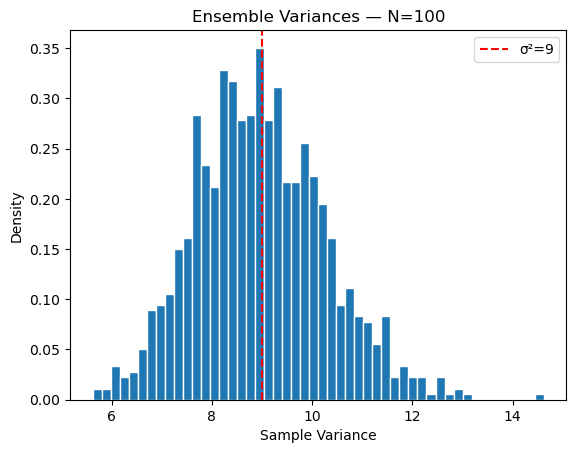

In [67]:
plt.hist(variances[100], bins=50, density=True, edgecolor = 'white')
plt.axvline(sigma2, color='r', linestyle='--', label=f'σ²={sigma2}')
plt.title('Ensemble Variances — N=100')
plt.xlabel('Sample Variance')
plt.ylabel('Density')
plt.legend()
plt.show()

**N=100:** The distribution is narrower and more symmetric. The estimates are better concentrated around σ²=9, showing improved reliability compared to N=10.

Plot 3: N = 1000

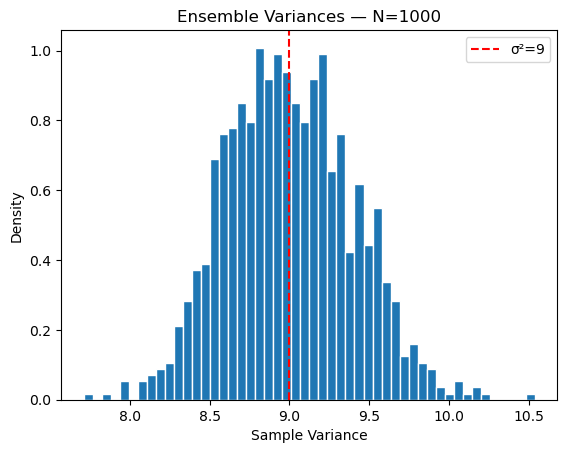

In [70]:
plt.hist(variances[1000], bins=50, density=True, edgecolor = 'white')
plt.axvline(sigma2, color='r', linestyle='--', label=f'σ²={sigma2}')
plt.title('Ensemble Variances — N=1000')
plt.xlabel('Sample Variance')
plt.ylabel('Density')
plt.legend()
plt.show()

**N=1000:** The distribution is very tight and nearly Gaussian, clustered closely around σ²=9. With many samples, each realization gives a highly accurate variance estimate.

Plot 4: All overlaid

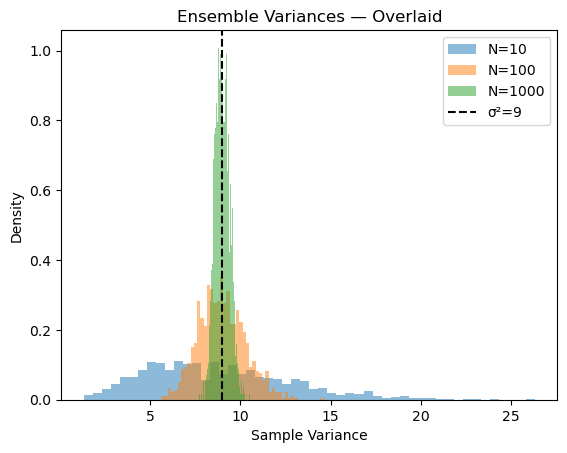

In [73]:
for N in N_values:
    plt.hist(variances[N], bins=50, density=True, alpha=0.5, label=f'N={N}')
plt.axvline(sigma2, color='k', linestyle='--', label=f'σ²={sigma2}')
plt.title('Ensemble Variances — Overlaid')
plt.xlabel('Sample Variance')
plt.ylabel('Density')
plt.legend()
plt.show()

**Overlaid comparison:** All three distributions are centered at σ²=9 — confirming the sample variance is an **unbiased estimator** regardless of N. The key difference is the spread: larger N produces a much tighter distribution.

**Overall conclusion:** The ensemble variances follow a scaled chi-squared distribution. More samples per realization → narrower spread → more consistent and reliable variance estimates. The mean always equals the true σ², but the uncertainty around it decreases as N grows.